In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/HPC/lion.jpg').convert('L')
img.save('input.pgm')

input_file = 'input.pgm'

In [3]:
def load_pgm_image(filename):
    with open(filename, 'rb') as f:
        magic_number = f.readline().strip()
        if magic_number != b'P5':
            raise ValueError("Not a valid PGM file (must be binary P5 format).")

        line = f.readline().strip()
        while line.startswith(b'#'):
            line = f.readline().strip()

        width, height = [int(i) for i in line.split()]
        max_val = int(f.readline().strip())

        pixels = []
        for y in range(height):
            row = []
            for x in range(width):
                pixel = ord(f.read(1))
                row.append(pixel)
            pixels.append(row)

    return pixels, width, height, max_val

def grayscale_stretch(pixels, width, height):
    min_intensity = min(min(row) for row in pixels)
    max_intensity = max(max(row) for row in pixels)

    stretched_pixels = []
    for row in pixels:
        stretched_row = []
        for pixel in row:
            new_intensity = int((pixel - min_intensity) / (max_intensity - min_intensity) * 255)
            stretched_row.append(new_intensity)
        stretched_pixels.append(stretched_row)

    return stretched_pixels

# Save PGM function
def save_pgm_image(filename, pixels, width, height, max_val=255):
    with open(filename, 'wb') as f:
        f.write(b'P5\n')
        f.write(f"{width} {height}\n".encode())
        f.write(f"{max_val}\n".encode())
        for row in pixels:
            f.write(bytes(row))

# Process the image
pixels, width, height, max_val = load_pgm_image(input_file)
stretched_pixels = grayscale_stretch(pixels, width, height)
save_pgm_image("stretched_output.pgm", stretched_pixels, width, height)




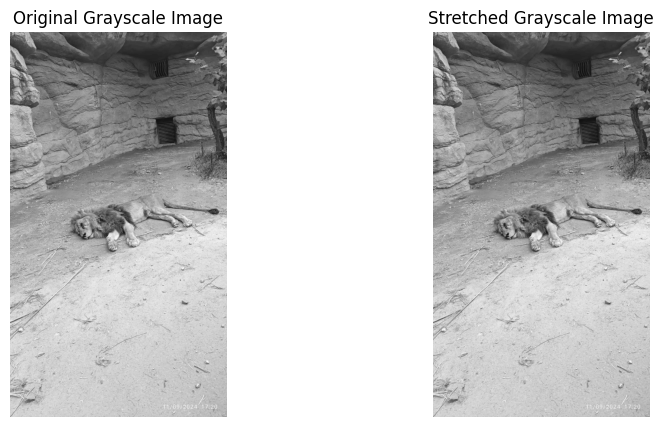

In [4]:
original_img = Image.open("input.pgm")
stretched_img = Image.open("stretched_output.pgm")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

axes[1].imshow(stretched_img, cmap='gray')
axes[1].set_title("Stretched Grayscale Image")
axes[1].axis("off")

plt.show()